In [1]:

from time import time



from sklearn.preprocessing import RobustScaler, PowerTransformer
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.dummy import *

from sklearn.model_selection import RandomizedSearchCV, KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os


import pandas as pd
import numpy as np
from sklearn.utils import class_weight
from sklearn.model_selection import train_test_split


from time import time
from keras.layers.core import Dense, Activation, Dropout
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM
from keras.layers import RNN, BatchNormalization
from keras.datasets import imdb
import keras.layers.advanced_activations
from tensorflow.keras.callbacks import TensorBoard

from sklearn.preprocessing import RobustScaler, PowerTransformer
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
#from sklearn.datasets import fetch_mldata
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.dummy import *
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import RandomizedSearchCV, KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
from hyperopt import Trials, STATUS_OK, tpe
from hyperas import optim
from hyperas.distributions import choice, uniform
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.layers import LSTM, Embedding
from keras.datasets import mnist
from keras.utils import np_utils
import pandas as pd
import numpy as np
from sklearn.utils import class_weight
from sklearn.model_selection import train_test_split
import tensorflow as tf

c:\programdata\anaconda3\envs\tensorflow\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\programdata\anaconda3\envs\tensorflow\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
c:\programdata\anaconda3\envs\tensorflow\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
os.getcwd()
#os.chdir('/home/jgmeyer2/MHCpeptides/')

'C:\\Users\\qdickinson\\Jupyter Notebooks\\20201230_train_new_model_MHC_all5'

In [3]:
inp = pd.read_csv("A1101_binding.txt", header=0, low_memory=False, sep="\t")
inp.index = range(len(inp))
inp.head()

inp = inp.groupby('Sequence', as_index=False).mean()
inp

,Sequence,Intensity
0,AAAATSAGTR,0.253411
1,AAASSLLYK,0.748583
2,AAATSAGTR,0.231444
3,AAATSAGTRR,0.341356
4,AAAYFVGYLK,1.000000
...,...,...
6278,YYKDDISYF,0.084687
6279,YYLEKANKI,0.084687
6280,YYPEDPVKL,0.084687
6281,YYQLCQHLK,0.469617


### group strings that have the same first 8 characters

In [4]:
peptides = inp['Sequence'].tolist()
#peptides

In [5]:
peptides_sorted = inp['Sequence'].tolist()
peptides_sorted.sort()
peptides_sorted


['AAAATSAGTR',
 'AAASSLLYK',
 'AAATSAGTR',
 'AAATSAGTRR',
 'AAAYFVGYLK',
 'AACAMLLVK',
 'AADEPPLVR',
 'AADFPGIAR',
 'AADKAAAAY',
 'AAERGPGQML',
 'AAFLDDNAF',
 'AAFQSSMTK',
 'AAGIAWIPY',
 'AAGIIILMEY',
 'AAGLPAIFV',
 'AAHARFVAA',
 'AAIDGEYRLK',
 'AAIDLSHFL',
 'AAIDRQVSVK',
 'AAISDYDYY',
 'AAISKLGINY',
 'AAKKKGASL',
 'AAKYVEHDPR',
 'AALDGTFQR',
 'AALDGTFQRK',
 'AALDLSHFL',
 'AALEGLSGF',
 'AALFMYYAK',
 'AALFMYYAKR',
 'AALSSLAKH',
 'AAMQRKLEK',
 'AAMVLLLRK',
 'AANEIRISK',
 'AANEMGLIEK',
 'AANTVIWDY',
 'AARILSEKR',
 'AARILSEKRK',
 'AASCGGAVF',
 'AATIQTPTK',
 'AAVDLSHFL',
 'AAVTLNRIK',
 'AAYFVGYLK',
 'AAYYFMKFR',
 'AAYYFMKFRR',
 'ACMDGFEVV',
 'ACNKIKGKK',
 'ACQEAVKLK',
 'ACRCGRFQK',
 'ACREQQLPV',
 'ACYNTCYCK',
 'ADFKLFFRW',
 'ADLRFASEF',
 'AEALLADGL',
 'AEDMLNPNY',
 'AEFKYIAAV',
 'AEFPVGSTA',
 'AEFWDVFLS',
 'AEGTGITHL',
 'AEHDPWWAV',
 'AEHFENQVL',
 'AEIDRSFKP',
 'AEILSGRVI',
 'AEKSRGRRI',
 'AEMGGHAER',
 'AEMKTDAA',
 'AEMKTDAAT',
 'AEMKTDAATL',
 'AEMRAYHGF',
 'AEMRETHWL',
 'AENGWGFYF',
 'AENK

In [6]:
### get the first 8 amino acids for the 'core sequence'
first8 = [x[:8] for x in peptides]
#first8

In [7]:
print(len(first8))
print(len(set(first8)))

6283
6010


In [8]:
print(len(first8))
print(len(set(first8)))

6283
6010


In [9]:
unique_cores = set(first8)

In [10]:
### make a dict with the indexes of the positions for each of the unique core sequences
core_seqs_dict = {}
n=0
for x in list(unique_cores):
    #print(n)
    core_seqs_dict[n] = [i for i, y in enumerate(first8) if y == x ]
    n+=1

In [11]:
core_seqs_dict[202]

[3430]

In [12]:
len(inp['Sequence'])

6283

In [13]:
# are there duplicate peptides?
len(set(inp['Sequence']))

6283

In [14]:
inp['namelen']= [len(str(i)) for i in inp['Sequence']]
input1 = inp[ (inp['namelen'] >= 2) ]
#parameters, max length of sequence with
maxlen = max([len(x) for x in input1.Sequence]) ### list comprehension to get max length of sequences

## encoding sequence by index for embedding layer

In [15]:
### make vocabulary for encoding
seq = input1['Sequence']
vocab = set(''.join([str(i) for i in seq]))
vocab.add('END')  # not using END cause they are all the same length
len_vocab = len(vocab)
print(vocab)

{'END', 'G', 'V', 'L', 'K', 'N', 'P', 'H', 'E', 'Y', 'A', 'I', 'W', 'R', 'S', 'C', 'F', 'T', 'Q', 'M', 'D'}


In [16]:
len_vocab

21

In [17]:
### always use alphabetical character index in the future
vocab_list = list(vocab)
vocab_list.sort()
vocab_list

['A',
 'C',
 'D',
 'E',
 'END',
 'F',
 'G',
 'H',
 'I',
 'K',
 'L',
 'M',
 'N',
 'P',
 'Q',
 'R',
 'S',
 'T',
 'V',
 'W',
 'Y']

In [18]:
char_index = dict((vocab_list[i], i) for i in range(len(vocab_list)))
X = []
x_name = [str(i)[0:maxlen] for i in seq]
for i in x_name:
    tmp = [char_index[j] for j in str(i)]
    for k in range(0,maxlen - len(str(i))):
        tmp.append(char_index["END"])
    X.append(tmp)

In [19]:
char_index

{'A': 0,
 'C': 1,
 'D': 2,
 'E': 3,
 'END': 4,
 'F': 5,
 'G': 6,
 'H': 7,
 'I': 8,
 'K': 9,
 'L': 10,
 'M': 11,
 'N': 12,
 'P': 13,
 'Q': 14,
 'R': 15,
 'S': 16,
 'T': 17,
 'V': 18,
 'W': 19,
 'Y': 20}

In [20]:
# compare the encoding with the sequences using above dictionary
print(peptides[0:6])
print(X[0:6])

['AAAATSAGTR', 'AAASSLLYK', 'AAATSAGTR', 'AAATSAGTRR', 'AAAYFVGYLK', 'AACAMLLVK']
[[0, 0, 0, 0, 17, 16, 0, 6, 17, 15], [0, 0, 0, 16, 16, 10, 10, 20, 9, 4], [0, 0, 0, 17, 16, 0, 6, 17, 15, 4], [0, 0, 0, 17, 16, 0, 6, 17, 15, 15], [0, 0, 0, 20, 5, 18, 6, 20, 10, 9], [0, 0, 1, 0, 11, 10, 10, 18, 9, 4]]


In [22]:
# Create an empty list 
all_int_list =[] 
# Iterate over each row 
for index, rows in input1.iterrows(): 
    # Create list for the current row 
    my_list=[rows.Intensity] #[rows.CRT, 
    # append the list to the final list 
    all_int_list.append(my_list) 
  
# Print the list 
print(all_int_list[0]) 

[0.25341089]


In [23]:
#intensities = input1['INTENSITY']
np.asarray(all_int_list).shape

(6283, 1)

In [24]:
# some values are below 0
min(all_int_list)

[-0.365513938]

In [19]:
# function to plot distributions of the intensity values across MHC
def pltgroup(ylabels):
    ''' only plots four histograms of y values to quickly compare distributions'''
    plt.rcParams['figure.figsize'] = [5, 5] 
    fig, (ax1) = plt.subplots(1,1, sharex='row', sharey='row')
    p0 = ax1.hist(ylabels, bins=100)
    #p1 = ax2.hist(ylabels[:,1], bins=100)
    ax1.set_title("CCS Train")
    
    plt.xlabel("CCS")
    plt.ylabel("number of examples")

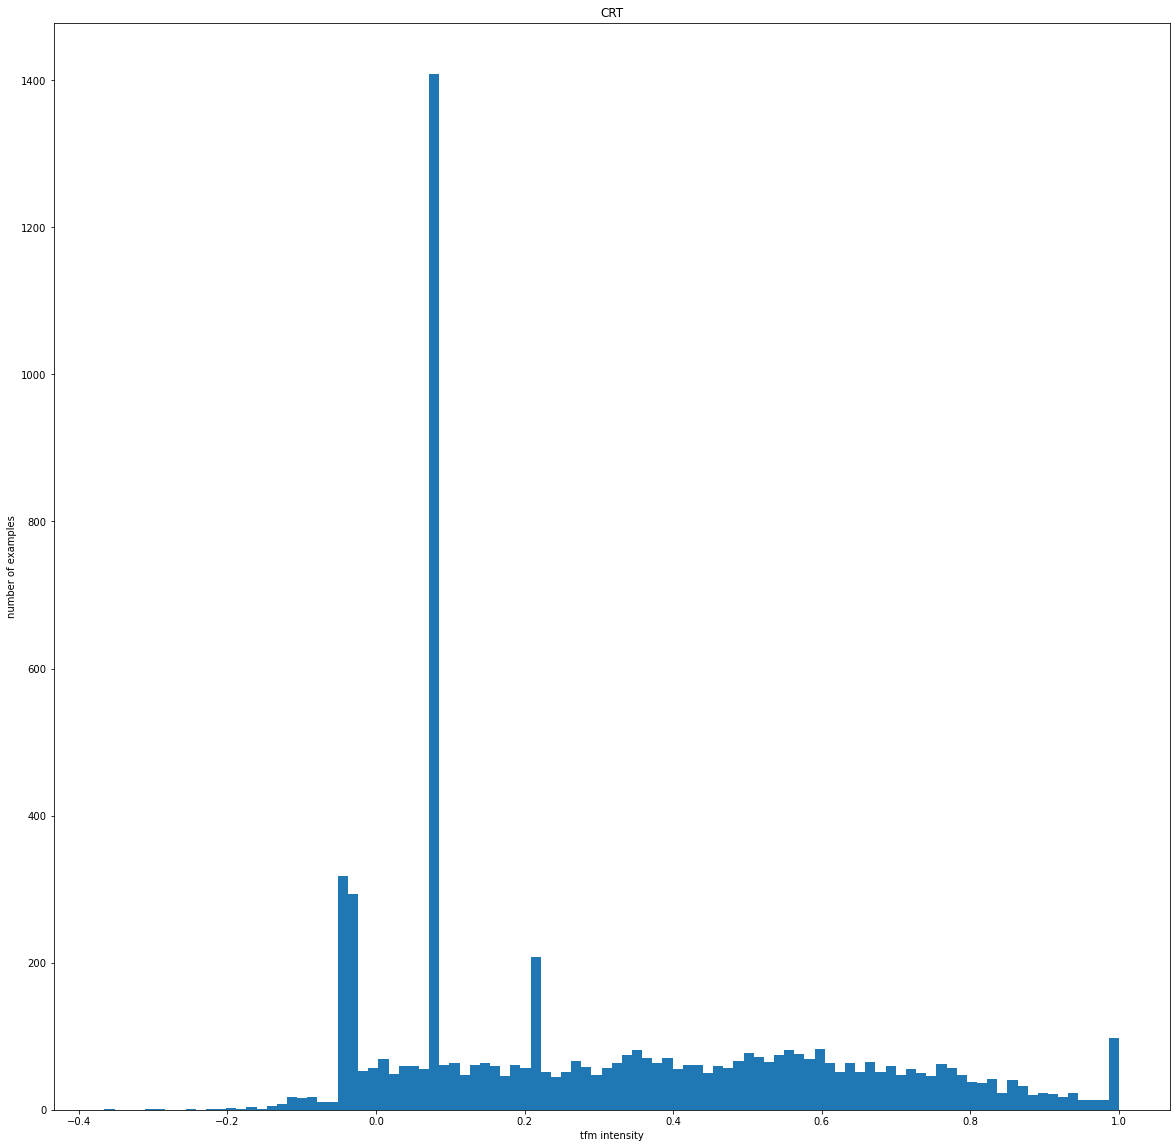

In [26]:
pltgroup(np.asarray(all_int_list))

In [27]:
X = np.asarray(X)
Y = np.asarray(all_int_list)
print(X.shape)  # regression from 10 values (max amino acid length)
print(Y.shape)  # To 5 values (each MHC complex)

(6283, 10)
(6283, 1)


In [28]:
len(core_seqs_dict)

6010

In [29]:
## train/test split based on the core 8 AA sequences
coretrainall, coretest = train_test_split(range(0, len(core_seqs_dict)), test_size=0.10, random_state=42)
# split train into train/validation
coretrain, coreval = train_test_split(coretrainall, test_size=0.20, random_state=42)

In [30]:
coretrain[0:10]

[4056, 2175, 215, 75, 4603, 4909, 5255, 4997, 1921, 3096]

In [31]:
print(len(coretrainall))
print(len(coretrain))
print(len(coreval))
print(len(coretest))
print(len(coretrain)+ len(coretest)+len(coreval))

5409
4327
1082
601
6010


In [32]:
## use those indexes in the dictionary core_seq_dict to assign actual training and testing
tmplist = [core_seqs_dict[x] for x in coretrain]
trainindex = []
for x in tmplist:
    trainindex+=x
len(trainindex)

4522

In [33]:
## use those indexes in the dictionary core_seq_dict to assign actual training and testing
tmplist = [core_seqs_dict[x] for x in coreval]
valindex = []
for x in tmplist:
    valindex+=x
len(valindex)

1132

In [34]:
## use those indexes in the dictionary core_seq_dict to assign actual training and testing
tmplist = [core_seqs_dict[j] for j in coretest]
testindex = []
for x in tmplist:
    testindex += x
len(testindex)

629

In [35]:
Xtrain = X[trainindex]
Xval = X[valindex]
Xtest = X[testindex]

Ytrain = Y[trainindex]
Yval = Y[valindex]
Ytest = Y[testindex]
print(len(Xtrain))
print(len(Xval))
print(len(Xtest))
print(len(Ytrain))
print(len(Yval))
print(len(Ytest))

4522
1132
629
4522
1132
629


In [36]:
Xtestseq = inp['Sequence'][testindex]

In [37]:
Y[testindex[0]]

array([0.08468665])

In [38]:
testindex[0:10]

[604, 2691, 5621, 5141, 2559, 5241, 5242, 1984, 562, 2076]

In [39]:
char_index

{'A': 0,
 'C': 1,
 'D': 2,
 'E': 3,
 'END': 4,
 'F': 5,
 'G': 6,
 'H': 7,
 'I': 8,
 'K': 9,
 'L': 10,
 'M': 11,
 'N': 12,
 'P': 13,
 'Q': 14,
 'R': 15,
 'S': 16,
 'T': 17,
 'V': 18,
 'W': 19,
 'Y': 20}

In [40]:
## compare order of xtestsequence version and xtest numeric encoding
Xtestseq[0:10]

604      CHKGWGVSV
2691     KSDGTGTIY
5621    VLNRHAITMY
5141     TIANSNIIK
2559     KLFKKTDFK
5241      TLYCVHQR
5242     TLYCVHQRI
1984     IEELREHLL
562      AVYSICKFY
2076     IIYYQLAGY
Name: Sequence, dtype: object

In [41]:
print(Xtest)

Ytest

[[ 1  7  9 ... 16 18  4]
 [ 9 16  2 ...  8 20  4]
 [18 10 12 ... 17 11 20]
 ...
 [15  0 11 ...  7 15  4]
 [15  8 11 ...  5  6  9]
 [15 10 11 ... 10  8  4]]


array([[ 8.46866460e-02],
       [ 8.46866460e-02],
       [ 3.64742357e-01],
       [ 6.66850905e-01],
       [ 7.98402748e-01],
       [ 5.64729509e-01],
       [ 2.62595260e-02],
       [-4.10069700e-02],
       [ 3.93477027e-01],
       [ 5.39731674e-01],
       [ 7.16020853e-01],
       [ 2.12812595e-01],
       [ 3.84940524e-01],
       [ 8.46866460e-02],
       [ 4.66723795e-01],
       [ 5.59283476e-01],
       [ 1.69569900e-01],
       [-2.30637450e-02],
       [ 1.63945741e-01],
       [ 1.29123322e-01],
       [ 5.53215417e-01],
       [ 8.46866460e-02],
       [ 8.46866460e-02],
       [-3.07903210e-02],
       [ 4.98367086e-01],
       [ 8.46866460e-02],
       [ 6.48312784e-01],
       [ 7.87822804e-01],
       [ 6.52822372e-01],
       [ 3.85327886e-01],
       [ 3.26225729e-01],
       [ 7.23702736e-01],
       [ 8.46866460e-02],
       [ 8.46866460e-02],
       [ 8.46866460e-02],
       [ 3.07288549e-01],
       [ 2.65872515e-01],
       [ 8.46866460e-02],
       [ 8.4

In [42]:
## save numpy arrays of each for the hyperas hyperparameter search loop
np.savetxt('20210524_A1101_xtrain.txt', Xtrain)
np.savetxt('20210524_A1101_xval.txt', Xval)
np.savetxt('20210524_A1101_xtest.txt', Xtest)
np.savetxt('20210524_A1101_ytrain.txt', Ytrain)
np.savetxt('20210524_A1101_yval.txt', Yval)
np.savetxt('20210524_A1101_ytest.txt', Ytest)

In [43]:
Ytrain

array([[0.480269  ],
       [0.08468665],
       [0.36028362],
       ...,
       [0.08468665],
       [0.08468665],
       [0.39413205]])

### check that the train and test sets have similar class distro

In [44]:
print(np.loadtxt('20210429_CRT_CCS_ytrain.txt'))

[383.9534014  341.2742951  322.6715301  ... 317.9521273  372.11204427
 357.52811655]


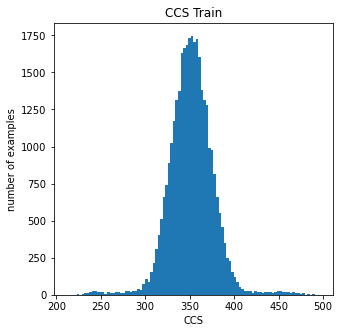

In [26]:
ylabels = np.loadtxt('20210429_CRT_CCS_ytrain.txt') # train set


plt.rcParams['figure.figsize'] = [5, 5] 
fig, (ax1) = plt.subplots(1,1, sharex='row', sharey='row')
p0 = ax1.hist(ylabels, bins=100)
#p1 = ax2.hist(ylabels[:,1], bins=100)
ax1.set_title("CCS Train")

plt.xlabel("CCS")
plt.ylabel("number of examples")
plt.savefig('ytrain_CCS.svg')
plt.show()

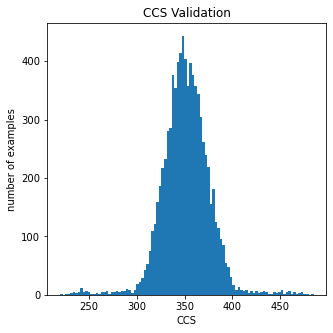

In [28]:
# validation set

ylabels = np.loadtxt('20210429_CRT_CCS_yval.txt') 


plt.rcParams['figure.figsize'] = [5, 5] 
fig, (ax1) = plt.subplots(1,1, sharex='row', sharey='row')
p0 = ax1.hist(ylabels, bins=100)
#p1 = ax2.hist(ylabels[:,1], bins=100)
ax1.set_title("CCS Validation")

plt.xlabel("CCS")
plt.ylabel("number of examples")
plt.savefig('yval_CCS.svg')
plt.show()

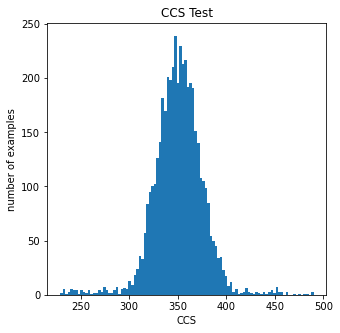

In [29]:
# test set

ylabels = np.loadtxt('20210429_CRT_CCS_ytest.txt') 


plt.rcParams['figure.figsize'] = [5, 5] 
fig, (ax1) = plt.subplots(1,1, sharex='row', sharey='row')
p0 = ax1.hist(ylabels, bins=100)
#p1 = ax2.hist(ylabels[:,1], bins=100)
ax1.set_title("CCS Test")

plt.xlabel("CCS")
plt.ylabel("number of examples")
plt.savefig('ytest_CCS.svg')
plt.show()

# quick test one parameter set showing model works

In [48]:
keras.__version__
tf.__version__

'2.3.1'

In [11]:
#Model for CCS

os.environ["TF_FORCE_GPU_ALLOW_GROWTH"]="true"
X_train = np.loadtxt('20210429_CRT_CCS_xtrain.txt')
X_val = np.loadtxt('20210429_CRT_CCS_xval.txt')
Y_train = np.loadtxt('20210429_CRT_CCS_ytrain.txt')
Y_val = np.loadtxt('20210429_CRT_CCS_yval.txt')

model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(output_dim=50 , input_dim=21, input_length=10))

model.add(tf.keras.layers.LSTM(128, return_sequences=False, input_shape=(10,21)))
model.add(tf.keras.layers.Dropout(0.5324275624952207))
#model.add(tf.keras.layers.LSTM(128, return_sequences=False))
#model.add(tf.keras.layers.Dropout(0.1829057341070159))
#model.add(tf.keras.layers.LSTM(128, return_sequences=False))
#model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(64))

#model.add(tf.keras.layers.LeakyReLU(alpha=0.3))
#model.add(BatchNormalization())
model.add(tf.keras.layers.Dropout(0.08657063211846627))

model.add(tf.keras.layers.Dense(1))
optimizermodel = tf.keras.optimizers.Adam(0.001)
optimizermodel.learning_rate.assign(0.005)
#print(optimizer.learning_rate)
model.compile(loss='mse', optimizer = optimizermodel,  metrics=['mse'])

hist = model.fit(X_train, Y_train,
          batch_size=128,
          epochs= 200,
          verbose=2,
          validation_data=(X_val, Y_val))


Epoch 1/200
259/259 - 6s - loss: 8919.9648 - mse: 8919.9648 - val_loss: 622.3585 - val_mse: 622.3585
Epoch 2/200
259/259 - 5s - loss: 1895.3975 - mse: 1895.3975 - val_loss: 702.3961 - val_mse: 702.3961
Epoch 3/200
259/259 - 5s - loss: 1890.8810 - mse: 1890.8810 - val_loss: 622.4883 - val_mse: 622.4883
Epoch 4/200
259/259 - 5s - loss: 1846.2548 - mse: 1846.2548 - val_loss: 656.1542 - val_mse: 656.1542
Epoch 5/200
259/259 - 5s - loss: 1831.6921 - mse: 1831.6921 - val_loss: 631.7366 - val_mse: 631.7366
Epoch 6/200
259/259 - 5s - loss: 1844.0239 - mse: 1844.0239 - val_loss: 670.5635 - val_mse: 670.5635
Epoch 7/200
259/259 - 5s - loss: 1772.4758 - mse: 1772.4758 - val_loss: 736.3516 - val_mse: 736.3516
Epoch 8/200
259/259 - 5s - loss: 1713.8384 - mse: 1713.8384 - val_loss: 651.2838 - val_mse: 651.2838
Epoch 9/200
259/259 - 5s - loss: 1686.0089 - mse: 1686.0089 - val_loss: 656.8904 - val_mse: 656.8904
Epoch 10/200
259/259 - 5s - loss: 1589.9058 - mse: 1589.9058 - val_loss: 631.3134 - val_mse

Epoch 83/200
259/259 - 5s - loss: 283.4804 - mse: 283.4804 - val_loss: 207.7285 - val_mse: 207.7285
Epoch 84/200
259/259 - 5s - loss: 279.5355 - mse: 279.5355 - val_loss: 212.2546 - val_mse: 212.2546
Epoch 85/200
259/259 - 5s - loss: 282.4121 - mse: 282.4121 - val_loss: 208.1000 - val_mse: 208.1000
Epoch 86/200
259/259 - 5s - loss: 276.3177 - mse: 276.3177 - val_loss: 206.6894 - val_mse: 206.6894
Epoch 87/200
259/259 - 5s - loss: 275.6765 - mse: 275.6765 - val_loss: 211.5754 - val_mse: 211.5754
Epoch 88/200
259/259 - 5s - loss: 280.8474 - mse: 280.8474 - val_loss: 208.4934 - val_mse: 208.4934
Epoch 89/200
259/259 - 5s - loss: 277.5379 - mse: 277.5379 - val_loss: 212.1485 - val_mse: 212.1485
Epoch 90/200
259/259 - 5s - loss: 280.7056 - mse: 280.7056 - val_loss: 210.1000 - val_mse: 210.1000
Epoch 91/200
259/259 - 5s - loss: 273.6193 - mse: 273.6193 - val_loss: 216.3699 - val_mse: 216.3699
Epoch 92/200
259/259 - 5s - loss: 276.9656 - mse: 276.9656 - val_loss: 221.1563 - val_mse: 221.1563


Epoch 165/200
259/259 - 5s - loss: 229.8305 - mse: 229.8305 - val_loss: 221.7097 - val_mse: 221.7097
Epoch 166/200
259/259 - 5s - loss: 227.6219 - mse: 227.6219 - val_loss: 217.8669 - val_mse: 217.8669
Epoch 167/200
259/259 - 5s - loss: 225.5921 - mse: 225.5921 - val_loss: 219.9142 - val_mse: 219.9142
Epoch 168/200
259/259 - 5s - loss: 226.3801 - mse: 226.3801 - val_loss: 218.9793 - val_mse: 218.9793
Epoch 169/200
259/259 - 5s - loss: 230.2745 - mse: 230.2745 - val_loss: 216.7166 - val_mse: 216.7166
Epoch 170/200
259/259 - 5s - loss: 227.0955 - mse: 227.0955 - val_loss: 216.1178 - val_mse: 216.1178
Epoch 171/200
259/259 - 5s - loss: 229.0494 - mse: 229.0494 - val_loss: 223.7337 - val_mse: 223.7337
Epoch 172/200
259/259 - 5s - loss: 225.7099 - mse: 225.7099 - val_loss: 220.1747 - val_mse: 220.1747
Epoch 173/200
259/259 - 5s - loss: 225.6788 - mse: 225.6788 - val_loss: 217.8576 - val_mse: 217.8576
Epoch 174/200
259/259 - 5s - loss: 227.8830 - mse: 227.8830 - val_loss: 216.6848 - val_mse:

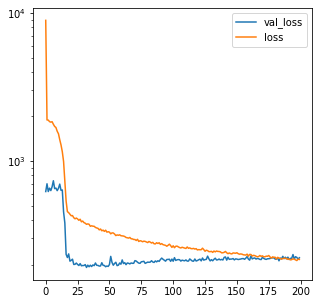

In [13]:
# plot validation and training loss to assess overfitting
plt.semilogy(hist.history['val_loss'])
plt.semilogy(hist.history['loss'])
plt.legend(['val_loss', 'loss'])
plt.savefig('lossplot_CCS.svg')

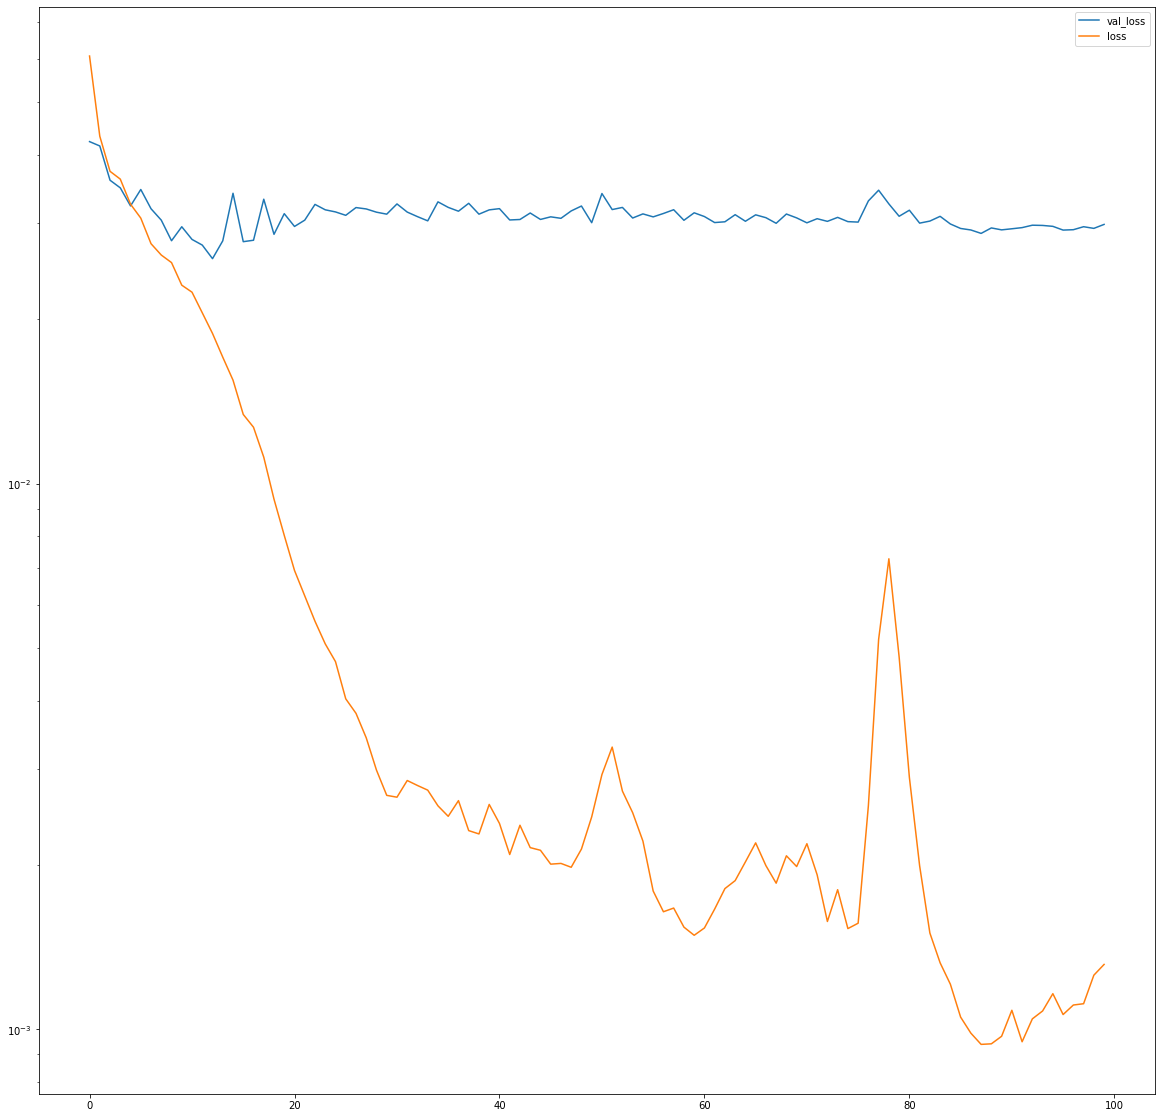

In [53]:
# without batchnorm looks similar 
plt.semilogy(hist.history['val_loss'])
plt.semilogy(hist.history['loss'])
plt.legend(['val_loss', 'loss'])

### trained on the raw intensity output so no need to inverse_transform 

In [59]:
model.summary() # best model architecture

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 10, 50)            1050      
_________________________________________________________________
lstm_1 (LSTM)                (None, 128)               91648     
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_3 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 65        
Total params: 101,019
Trainable params: 101,019
Non-trainable params: 0
________________________________________________

In [30]:
model.save('20210603_CCS_200epoch.model') # save model for later

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: 20210603_CCS_200epoch.model\assets


In [6]:
def data():
    X_train = np.loadtxt('20210429_CRT_CCS_xtrain.txt')
    X_test = np.loadtxt('20210429_CRT_CCS_xtest.txt')
    Y_train = np.loadtxt('20210429_CRT_CCS_ytrain.txt')
    Y_test = np.loadtxt('20210429_CRT_CCS_ytest.txt')
    return X_train, Y_train, X_test, Y_test

def model(X_train, Y_train, X_test, Y_test):
    '''
    Model providing function:
    Create Keras model with double curly brackets dropped-in as needed.
    Return value has to be a valid python dictionary with two customary keys:
        - loss: Specify a numeric evaluation metric to be minimized
        - status: Just use STATUS_OK and see hyperopt documentation if not feasible
    The last one is optional, though recommended, namely:
        - model: specify the model just created so that we can later use it again.
    '''
    model = Sequential()
    model.add(Embedding(output_dim=50 , input_dim=21, input_length=10))
    model.add(LSTM(128, return_sequences=False, input_shape=(10,21)))
    model.add(Dropout({{uniform(0, 0.8)}}))
    #model.add(LSTM(128, return_sequences=False))
    #model.add(Dropout({{uniform(0, 0.6)}}))
    model.add(Dense(64))
    #model.add(keras.layers.LeakyReLU(alpha=0.3))
    #model.add(BatchNormalization())
    model.add(Dropout({{uniform(0, 0.8)}}))
    model.add(Dense(1))
    optimizermodel = tf.keras.optimizers.Adam(0.001)
    optimizermodel.learning_rate.assign({{choice([0.001, 0.005, 0.01, 0.05, 0.1])}})
    #print(optimizer.learning_rate)
    model.compile(loss='mse', optimizer = optimizermodel,  metrics=['mse'])
    
    model.compile(loss='mse', 
                  optimizer='adam', 
                  metrics=['mse'])

    model.fit(X_train, Y_train,
              batch_size={{choice([32, 64, 128, 256])}},
              epochs= {{choice([ 100, 500, 1000])}},
              verbose=0,
              validation_data=(X_test, Y_test))
    
    score, acc = model.evaluate(X_test, Y_test, verbose=0)
    print('Test accuracy:', acc)
    return {'loss': acc, 'status': STATUS_OK, 'model': model} #put negative sign in from of 'acc' for accuracy metric

best_run0, best_model0 = optim.minimize(model=model,
                                      notebook_name='20201230_train_new_model_MHC_all5',
                                      data=data,
                                      max_evals=1,
                                      algo=tpe.suggest,
                                      trials = Trials())

best_model0.save('20210505_testhyperparameter.model')

print(best_run0)

>>> Imports:
#coding=utf-8

try:
    from time import time
except:
    pass

try:
    from sklearn.preprocessing import RobustScaler, PowerTransformer
except:
    pass

try:
    from sklearn.preprocessing import MaxAbsScaler
except:
    pass

try:
    from sklearn.preprocessing import MinMaxScaler
except:
    pass

try:
    from sklearn.preprocessing import OneHotEncoder
except:
    pass

try:
    from sklearn.ensemble import RandomForestClassifier
except:
    pass

try:
    from sklearn.preprocessing import StandardScaler
except:
    pass

try:
    from sklearn import metrics
except:
    pass

try:
    from sklearn.model_selection import train_test_split
except:
    pass

try:
    from sklearn.linear_model import LogisticRegression
except:
    pass

try:
    from sklearn.metrics import mean_squared_error
except:
    pass

try:
    from sklearn.dummy import *
except:
    pass

try:
    from sklearn.model_selection import RandomizedSearchCV, KFold
except:
    pass

try:
    from sklearn

KeyboardInterrupt: 

In [4]:
print (best_run0)

{'Dropout': 0.04999730587706014, 'Dropout_1': 0.295346240262041, 'Dropout_2': 0.3257983840159514, 'assign': 4, 'batch_size': 2, 'epochs': 0}


# Get model predictions, inverse transform, and compare

In [2]:
X_test = np.loadtxt('20210429_CRT_CCS_xtest.txt')
y_test = np.loadtxt('20210429_CRT_CCS_ytest.txt')

In [4]:
import tensorflow as tf

In [3]:
#from tensorflow.compat.v1.keras.backend import get_session
#tf.compat.v1.disable_v2_behavior()
#shap.explainers._deep.deep_tf.op_handlers["AddV2"] = shap.explainers._deep.deep_tf.passthrough
model = tf.keras.models.load_model('20210603_CCS_200epoch.model')

In [4]:
y_pred = model.predict(X_test)
#y_pred_transform = mm.inverse_transform(y_pred)

In [33]:
y_pred.shape

(4600, 1)

In [34]:
y_test.shape

(4600,)

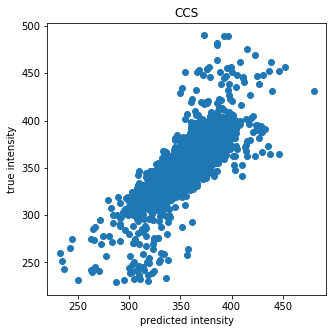

In [35]:

# wrong somehow
plt.rcParams['figure.figsize'] = [5, 5] 
fig, (ax1) = plt.subplots(1,1, sharex='row', sharey='row')
ax1.scatter(y_pred[:,0], y_test)


ax1.set_title("CCS")
plt.xlabel("predicted intensity")
plt.ylabel("true intensity")
plt.savefig('ccs_truevspredict.svg')

In [8]:
import scipy
#print(y_pred[:,1])
#print(y_test)
print(scipy.stats.spearmanr(y_pred[:,0], y_test))
#scipy.stats.spearmanr(y_pred[:,1], y_test[:,1])


SpearmanrResult(correlation=0.8598036014715501, pvalue=0.0)


417.70056
[[417.70056152 355.11120605 342.77307129 ... 348.03259277 345.27685547
  351.3927002 ]
 [426.80462365 338.4297709  340.4088373  ... 353.2415585  361.0859204
  334.0286007 ]]


c:\programdata\anaconda3\envs\tensorflow\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


SpearmanrResult(correlation=0.8291204264744282, pvalue=0.0)


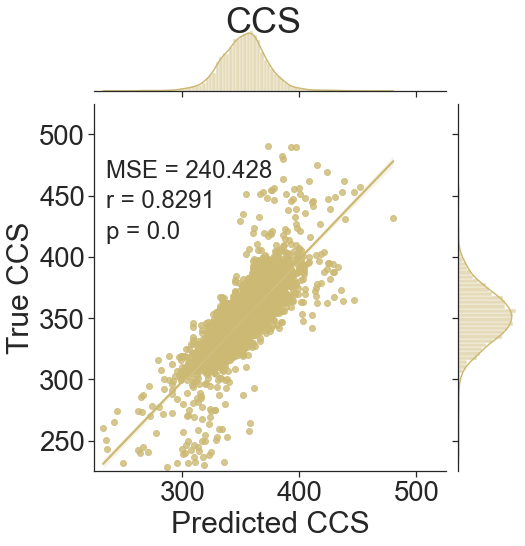

In [5]:
import sklearn
import scipy
import seaborn as sns
ccs = []
CCSpred = []



for value in y_pred:
    CCSpred.append(value[0])

print(CCSpred[0])
    
CCSreal = []
for value in y_test:
    CCSreal.append(value)

    
ccs.append(CCSpred)
ccs.append(CCSreal)
print(np.asarray(ccs))
dccs = {'Predicted CCS': CCSpred, 'True CCS': CCSreal}





dfccs = pd.DataFrame(data = dccs)





#fig, (ax1,ax2, ax3, ax4, ax5) = plt.subplots(1,5, sharex='row', sharey='row')

sns.set(style="ticks", color_codes=True, font_scale=2.5)
j = sns.jointplot('Predicted CCS', 'True CCS', data = dfccs, kind='reg',color='y', height=8, xlim = (225,525), ylim = (225,525))
#j.annotate(stats.pearsonr, loc = ("upper left"), fontsize=14)
j.fig.suptitle("CCS")
prCCS, pCCS = scipy.stats.spearmanr(CCSpred, CCSreal)
print(scipy.stats.spearmanr(CCSpred, CCSreal))
mseCCS=round(sklearn.metrics.mean_squared_error(CCSpred, CCSreal),4)
j.ax_joint.text(235,465,"MSE = " + str(mseCCS), fontsize=24)
j.ax_joint.text(235,440,"r = " + str(round(prCCS,4)), fontsize=24)
j.ax_joint.text(235,415,"p = " + str(pCCS), fontsize=24)
plt.savefig('CCSrealvspredicted.png')
plt.savefig('CCSrealvspredicted.svg')
plt.show()